# Lemniscate Snapshot Utilities Demo

This notebook builds a lemniscate (∞) factor graph, runs a single PropFlow engine execution with snapshots enabled, and exercises the snapshot utilities and visualisation helpers end-to-end.

In [12]:
from __future__ import annotations

from pathlib import Path
import json

import matplotlib.pyplot as plt
import numpy as np

from propflow import SnapshotAnalyzer, AnalysisReport, SnapshotVisualizer
from propflow.bp.engine_base import BPEngine
from propflow.configs import create_random_int_table
from propflow.snapshots.utils import (
    latest_snapshot,
    latest_jacobians,
    latest_cycles,
    latest_winners,
    get_snapshot,
)
from propflow.utils.fg_utils import FGBuilder

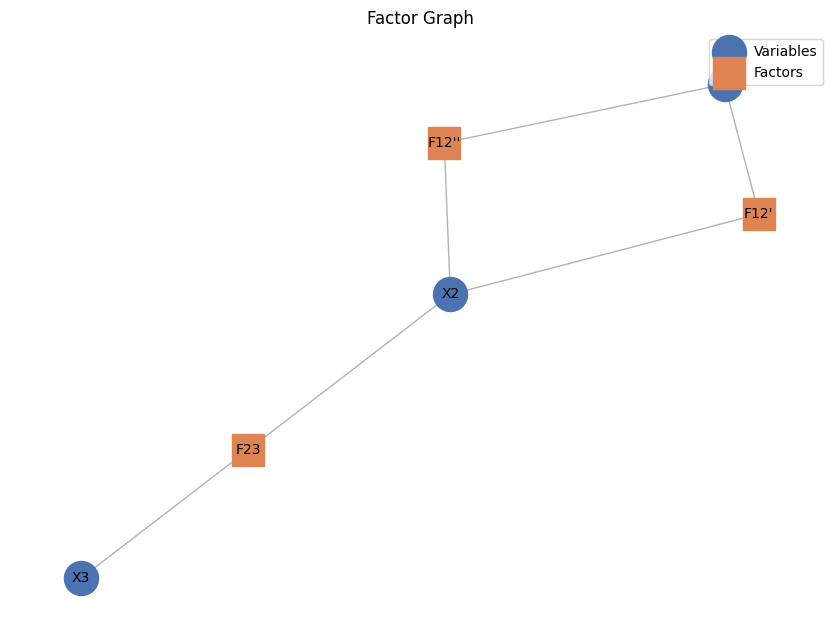

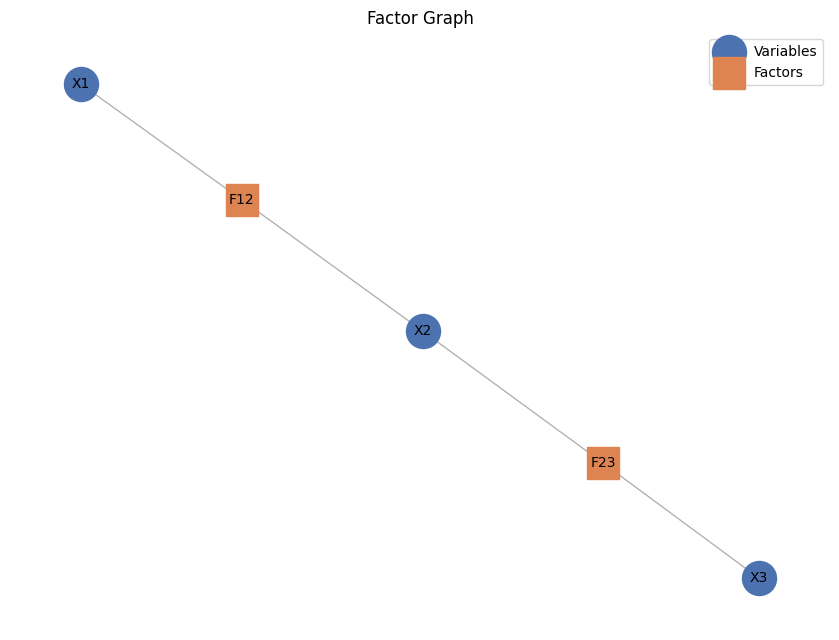

In [10]:
np.random.seed(7)

RUN_DIR = Path("results/notebooks/lemniscate_all_utils")
RUN_DIR.mkdir(parents=True, exist_ok=True)
from propflow import FactorAgent,VariableAgent
from propflow.core.components import CostTable
from propflow.policies import split_specific_factors

C12 : CostTable = np.array([[0.2,3.1]
                            ,[2.2,0.0]])
C23 : CostTable = np.array([[1,0],
                            [23,24]])
f12 = FactorAgent.create_from_cost_table("F12", cost_table=C12)
f23 = FactorAgent.create_from_cost_table("F23", cost_table=C23)
X1 = VariableAgent("X1", domain=2)
X2 = VariableAgent("X2", domain=2)
X3 = VariableAgent("X3", domain=2)


chain = FGBuilder.build_from_edges(
    variables=[X1, X2, X3],
    factors=[f12, f23],
    edges={f12: [X1, X2], f23: [X2, X3]},)
graph_split = FGBuilder.build_from_edges(
    variables=[X1, X2, X3],
    factors=[f12, f23],
    edges={f12: [X1, X2], f23: [X2, X3]},
)
split_specific_factors(graph_split, [f12])

engine_split = BPEngine(
    factor_graph=graph_split,
    use_bct_history=True,
)
engine_chain = BPEngine(chain)
graph_split.visualize(pretty=True)
chain.visualize(pretty=True)



In [3]:
# T1 = 
# T2 = 
# LAMBDA1= 
# LAMBDA2=




step:0:
winners are: {'X1': 1, 'X2': 0, 'X3': 1}
 all Q messages are: {('X1', "F12'"): array([0., 0.]), ('X1', "F12''"): array([0., 0.]), ('X1', 'F12'): array([0., 0.]), ('X2', 'F23'): array([0., 0.]), ('X2', "F12'"): array([0., 0.]), ('X2', "F12''"): array([0., 0.]), ('X2', 'F12'): array([0., 0.]), ('X3', 'F23'): array([0., 0.])}
 and all R messages are: {("F12'", 'X1'): array([0.1, 0. ]), ("F12'", 'X2'): array([0.1, 0. ]), ("F12''", 'X1'): array([0.1, 0. ]), ("F12''", 'X2'): array([0.1, 0. ]), ('F23', 'X2'): array([ 0., 23.]), ('F23', 'X3'): array([1., 0.])}


step:1:
winners are: {'X1': 0, 'X2': 0, 'X3': 1}
 all Q messages are: {('X1', "F12'"): array([0.1, 0. ]), ('X1', "F12''"): array([0.1, 0. ]), ('X2', "F12'"): array([ 0. , 22.9]), ('X2', "F12''"): array([ 0. , 22.9]), ('X2', 'F23'): array([0.2, 0. ]), ('X3', 'F23'): array([0., 0.])}
 and all R messages are: {("F12'", 'X1'): array([0.2, 1.2]), ("F12'", 'X2'): array([0.2, 0. ]), ("F12''", 'X1'): array([0.2, 1.2]), ("F12''", 'X2'

/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:868: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


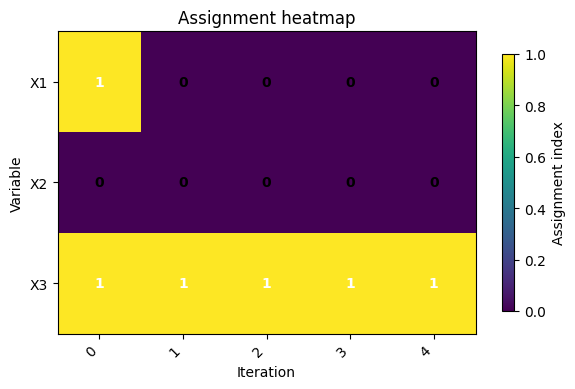

In [11]:
from propflow.snapshots.types import SnapshotRecord


for i in range(5):
    engine_split.step(i)

    latest:SnapshotRecord = latest_snapshot(engine_split) # type: ignore
    print(f"\n\nstep:{i}:\nwinners are: {latest.assignments}\n all Q messages are: {latest.Q}\n and all R messages are: {latest.R}")
#print(f'curr step: {latest.step}, latest.Q: {latest.Q}, latest.R: {latest.R}')
viz = SnapshotVisualizer(engine_split.snapshots)
viz.plot_assignment_heatmap()



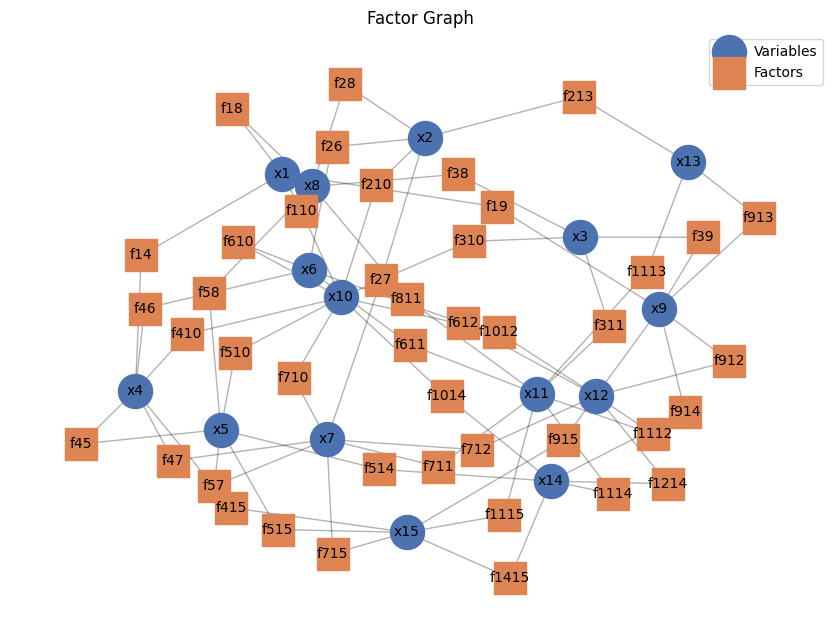

/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:929: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:868: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:929: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/or/Projects/Belief-Propagation-Simulator/src/propflow/snapshots/visualizer.py:868: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


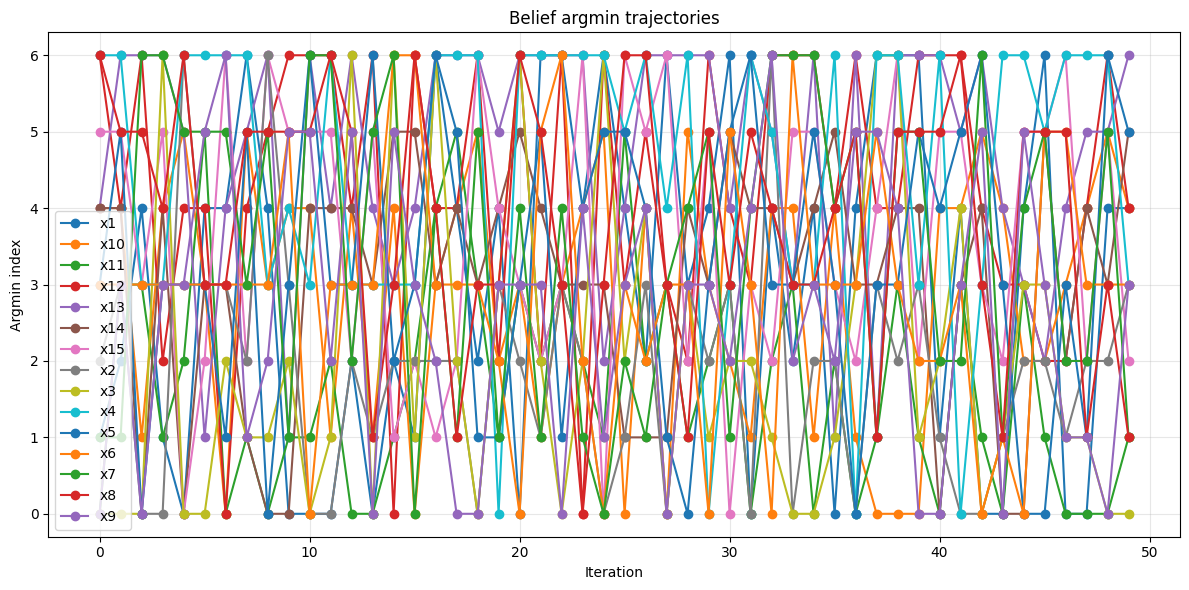

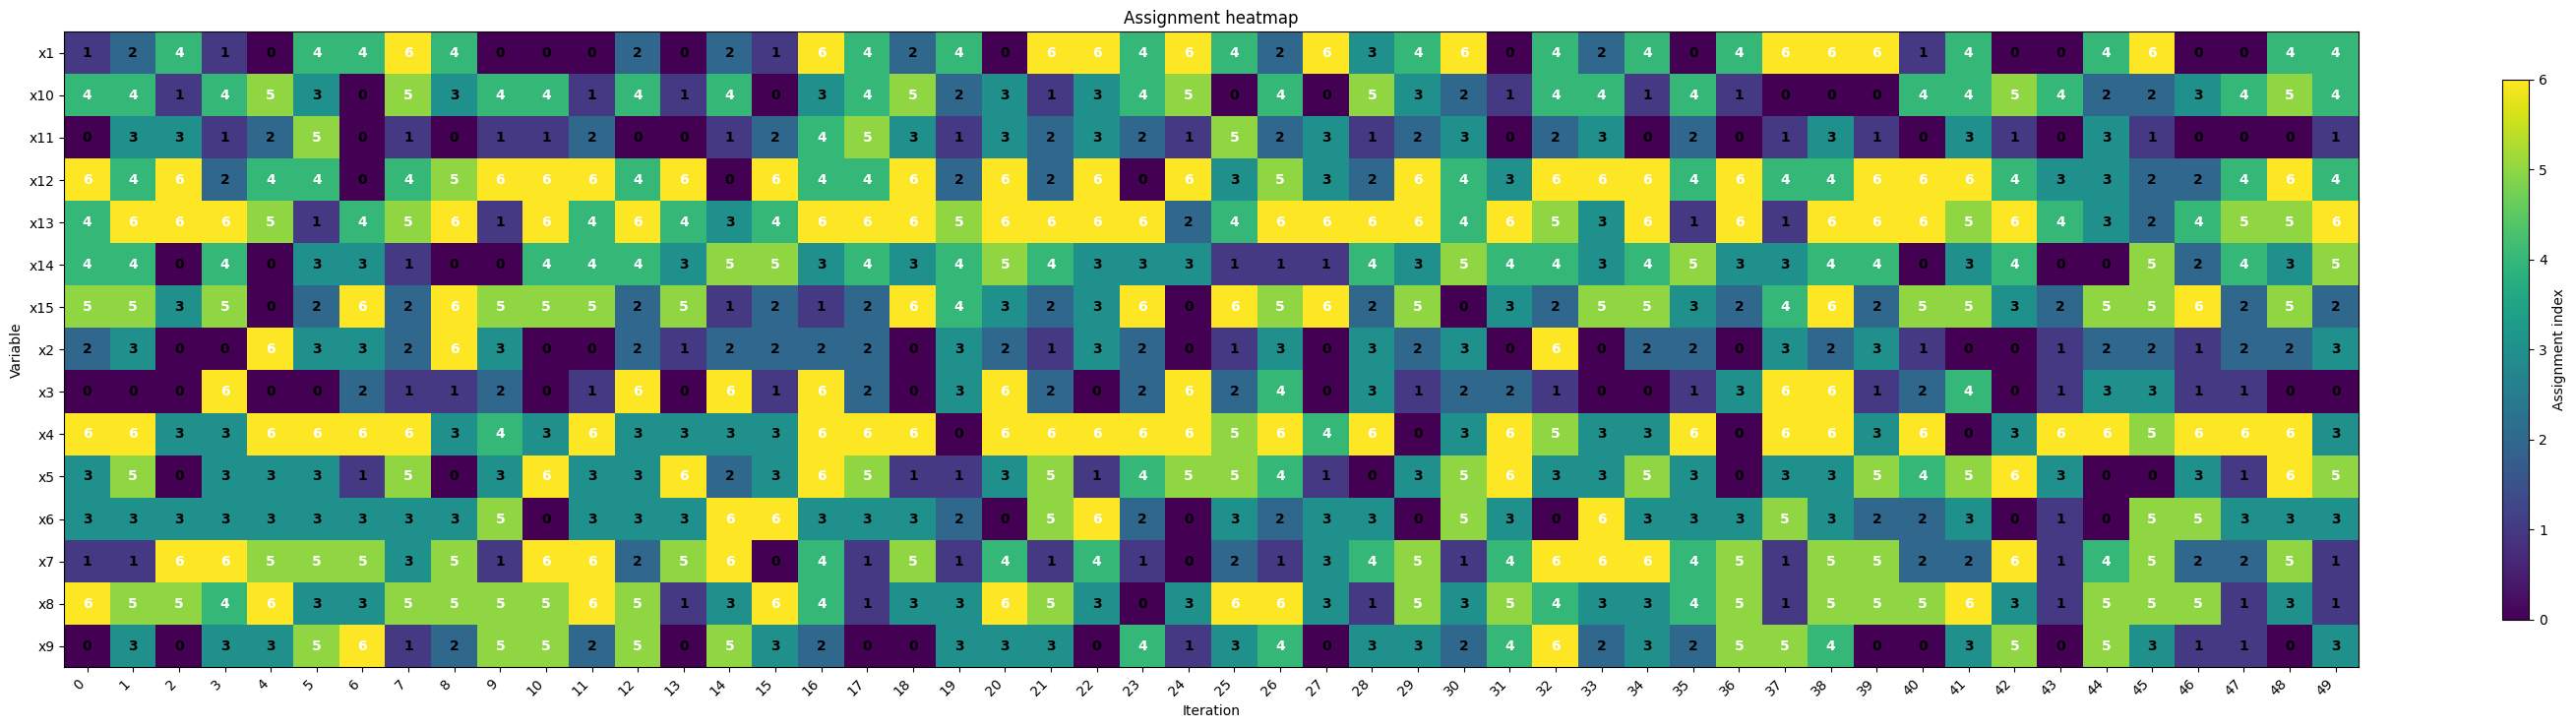

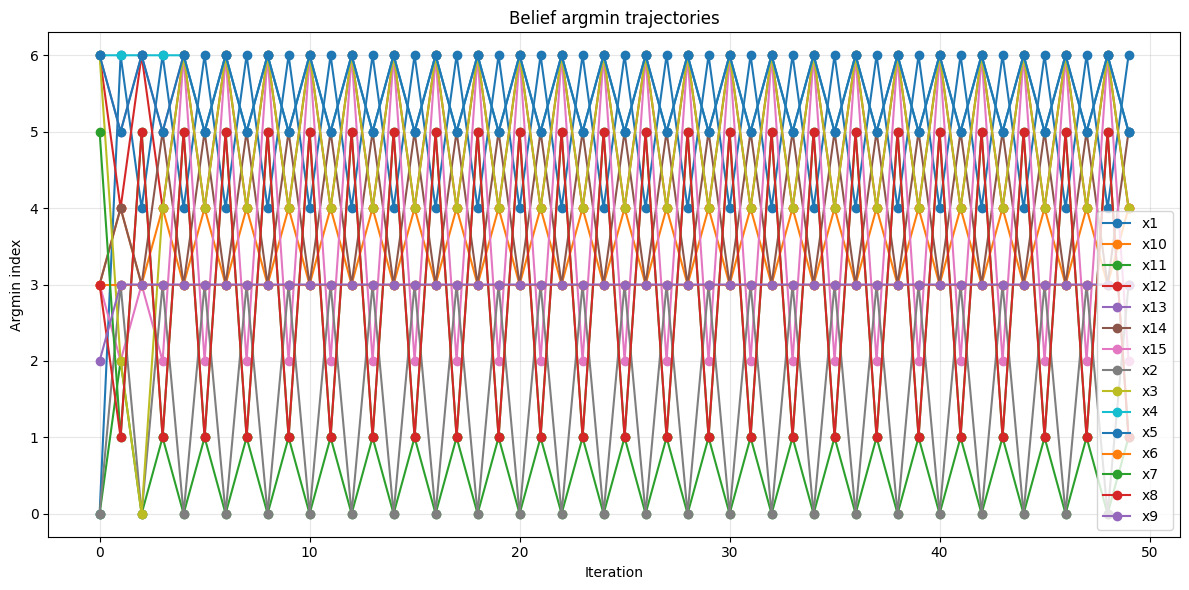

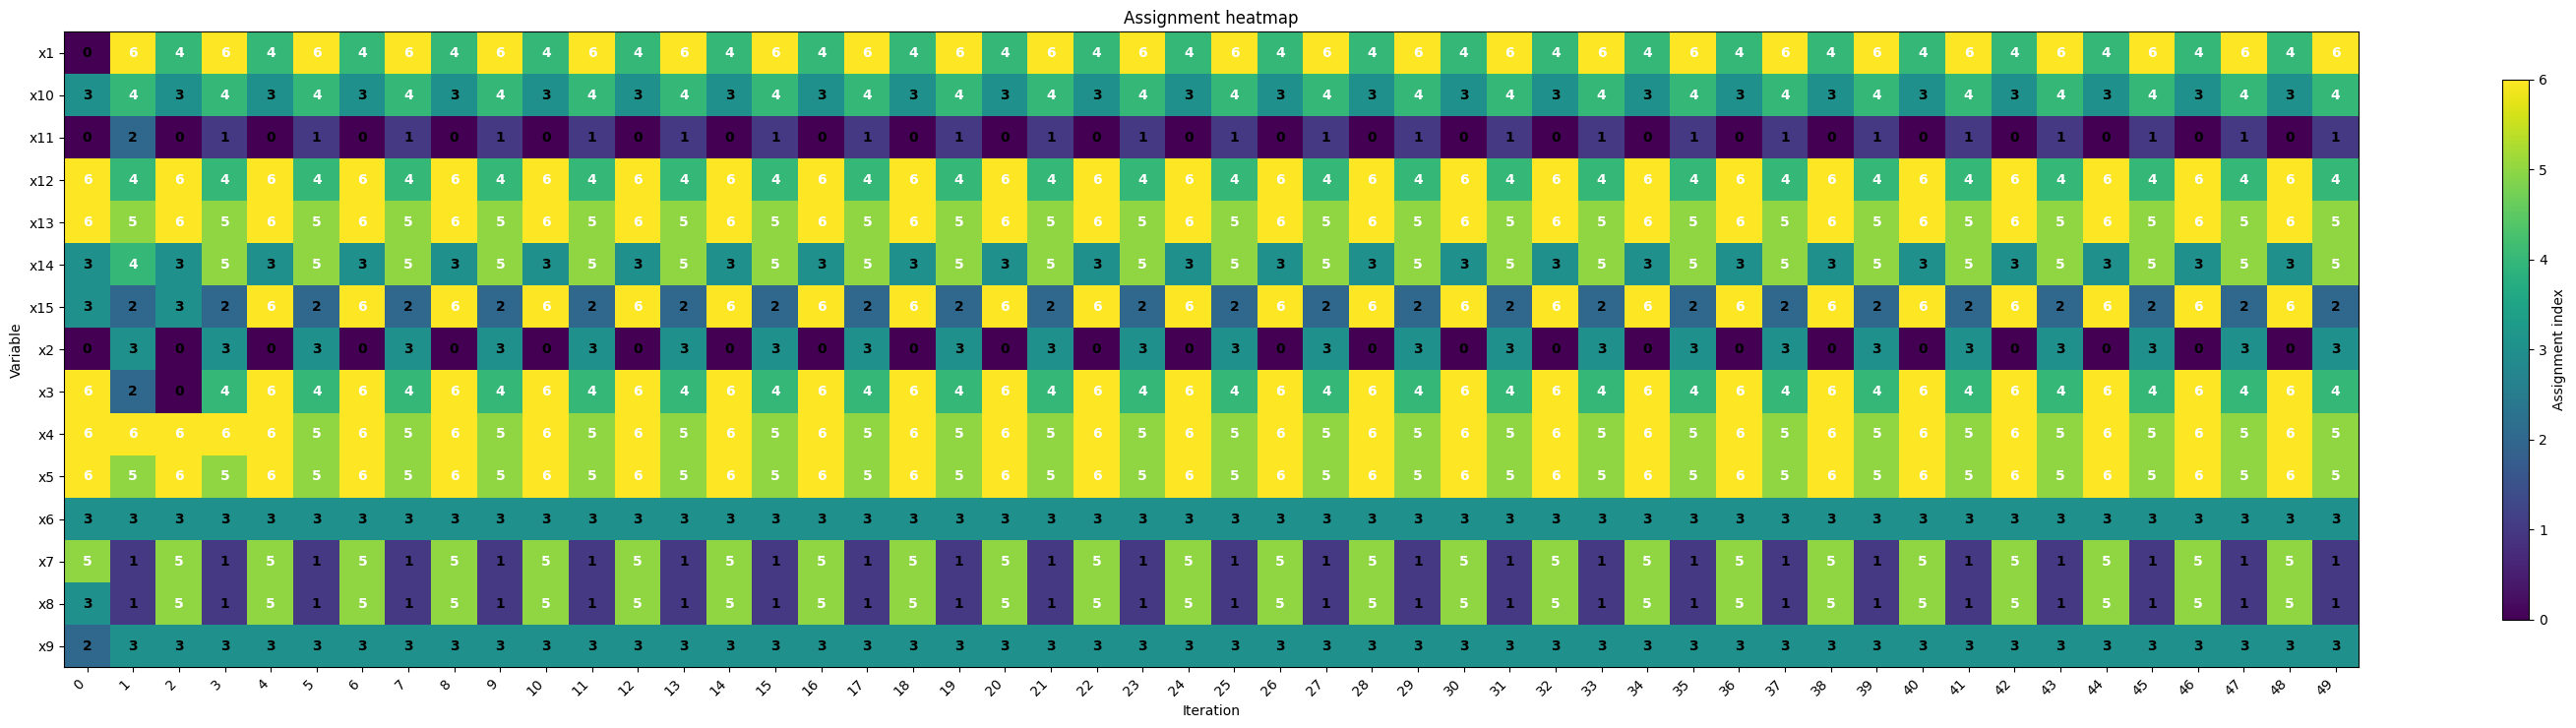

In [7]:
import pickle
from propflow.bp.engines import SplitEngine
from propflow.configs.global_config_mapping import CTFactories


r_fg = FGBuilder.build_random_graph(
    num_vars = 15,
    domain_size=7,
    ct_factory=CTFactories.UNIFORM,
    ct_params= {"low": 20, "high": 200},
    density=0.4
    )
r_fg.visualize(pretty=True)
r_engine = BPEngine(
    factor_graph=r_fg)
r_engine.run(max_iter=50)
r_viz = SnapshotVisualizer(r_engine.snapshots)
r_viz.plot_argmin_per_variable(layout = "combined")
r_viz.plot_assignment_heatmap()
split_engine = SplitEngine(factor_graph = pickle.loads(pickle.dumps(r_fg)))
split_engine.run(max_iter=50)
split_viz = SnapshotVisualizer(split_engine.snapshots)
split_viz.plot_argmin_per_variable(layout = "combined")
split_viz.plot_assignment_heatmap()



In [6]:
analyzer = SnapshotAnalyzer(snapshots)
report = AnalysisReport(analyzer)
latest_step = captured_steps[-1]
summary = report.to_json(step_idx=latest_step)
summary_keys = sorted(summary.keys())
print("Analysis report keys:", summary_keys)
summary["block_norms"]
analyzer.jacobian(1)



NameError: name 'snapshots' is not defined

In [ ]:
visualizer = SnapshotVisualizer(snapshots)  # type: ignore
print("Variables:", visualizer.variables())
series = visualizer.argmin_series()
print("Series tracked for", len(series), "variables")

visualizer.plot_argmin_per_variable(
    vars_filter=visualizer.variables()[:6],
    figsize=(10, 12),
)
plt.show()
